# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [149]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
import importlib
import api_keys
importlib.reload(api_keys)

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [150]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [151]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?appid=e24b8abe41d88a45ff122ae6a5884260&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cabedelo
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | tezu
Processing Record 4 of Set 1 | keflavik
Processing Record 5 of Set 1 | am timan
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | vorgashor
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | pangody
Processing Record 10 of Set 1 | castillos
Processing Record 11 of Set 1 | toga village
City not found. Skipping...
Processing Record 12 of Set 1 | yanchep
Processing Record 13 of Set 1 | katsuren-haebaru
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | nova vicosa
Processing Record 17 of Set 1 | puerto baquerizo moreno
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | carora
Processing Record 21 of Set 1 | tindouf
Processing Recor

In [152]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [153]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cabedelo,-6.9811,-34.8339,23.37,76,2,3.52,BR,1696218869
1,blackmans bay,-43.0167,147.3167,21.52,32,63,5.05,AU,1696218712
2,tezu,27.9167,96.1667,25.74,96,100,0.41,IN,1696218869
3,keflavik,64.0049,-22.5624,8.95,76,0,7.72,IS,1696218699
4,am timan,11.0297,20.2827,23.45,84,92,1.64,TD,1696218869


In [154]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [155]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cabedelo,-6.9811,-34.8339,23.37,76,2,3.52,BR,1696218869
1,blackmans bay,-43.0167,147.3167,21.52,32,63,5.05,AU,1696218712
2,tezu,27.9167,96.1667,25.74,96,100,0.41,IN,1696218869
3,keflavik,64.0049,-22.5624,8.95,76,0,7.72,IS,1696218699
4,am timan,11.0297,20.2827,23.45,84,92,1.64,TD,1696218869


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

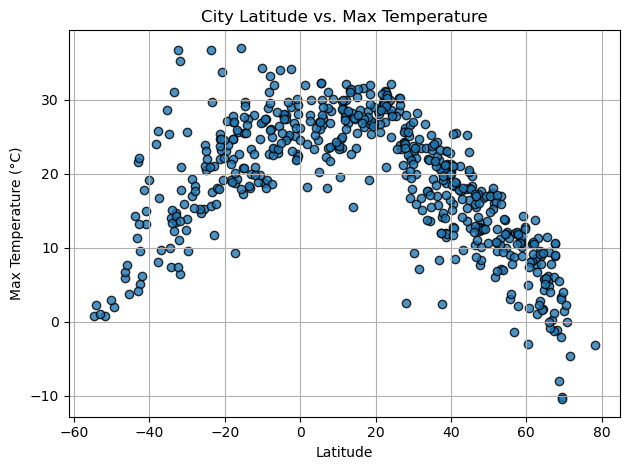

In [156]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (°C)")
plt.xlabel("Latitude")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

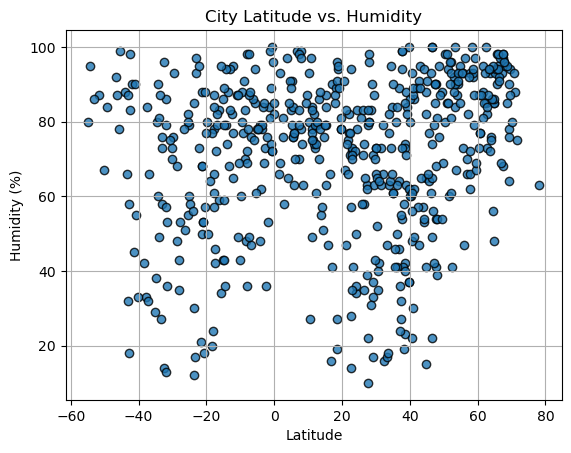

In [157]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], 
            city_data_df['Humidity'],
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

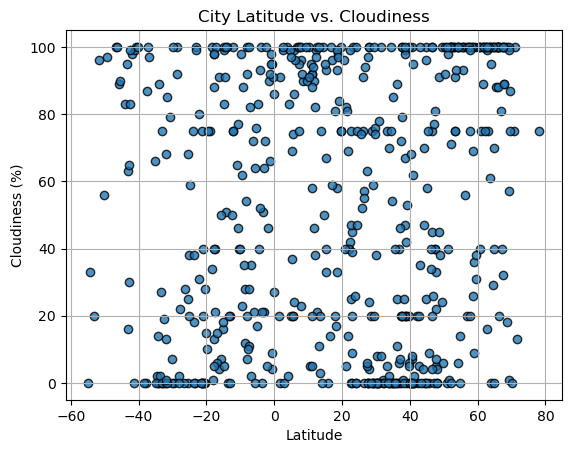

In [158]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], 
            city_data_df['Cloudiness'],
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

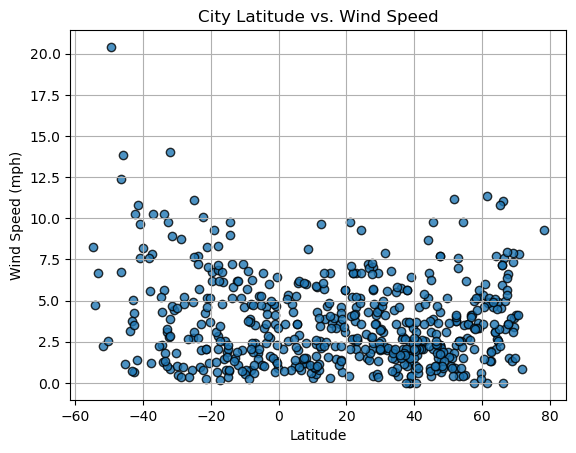

In [159]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], 
            city_data_df['Wind Speed'],
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [160]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.title(title)
    plt.show()

In [161]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_hemi_df.reset_index(inplace=True, drop=True)
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tezu,27.9167,96.1667,25.74,96,100,0.41,IN,1696218869
1,keflavik,64.0049,-22.5624,8.95,76,0,7.72,IS,1696218699
2,am timan,11.0297,20.2827,23.45,84,92,1.64,TD,1696218869
3,vorgashor,67.5833,63.9500,8.95,97,100,6.64,RU,1696218700
4,pangody,65.8500,74.4859,6.21,98,100,5.95,RU,1696218869


In [162]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
southern_hemi_df.reset_index(inplace=True, drop=True)
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cabedelo,-6.9811,-34.8339,23.37,76,2,3.52,BR,1696218869
1,blackmans bay,-43.0167,147.3167,21.52,32,63,5.05,AU,1696218712
2,edinburgh of the seven seas,-37.0676,-12.3116,9.75,66,97,10.29,SH,1696218699
3,hermanus,-34.4187,19.2345,14.02,60,0,4.29,ZA,1696218706
4,castillos,-34.1667,-53.8333,7.35,90,14,1.29,UY,1696218789


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7364172655778395


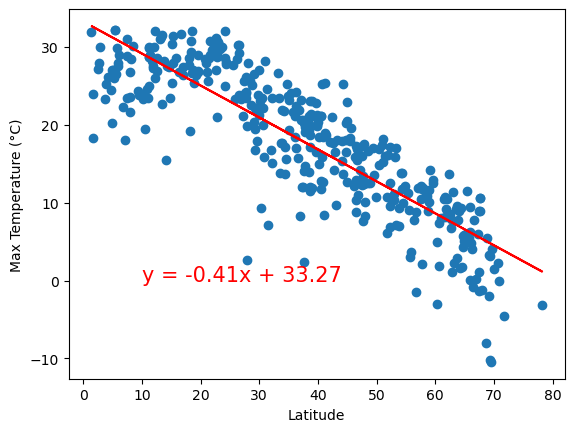

In [163]:
# Linear regression on Northern Hemisphere
# Set the x and y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Get the equation of the line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')

# Plot the regression line
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

# Annotate the plot with the equation of the line
plt.annotate(line_eq,(10,0),fontsize=15,color="red")

# Display the r-value
print(f"The r-value is: {r_value**2}")

# Display the plot
plt.show()

The r-value is: 0.4883267388120607


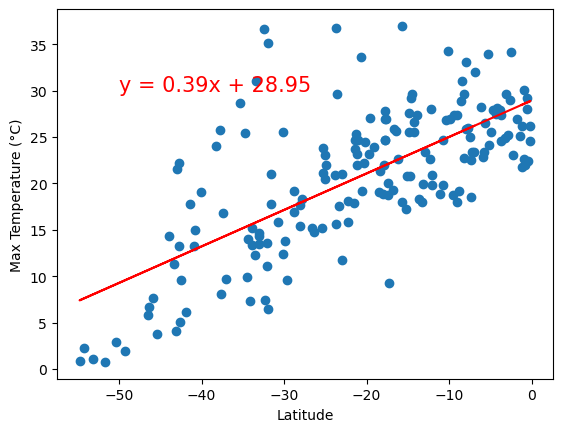

In [164]:
# Linear regression on Southern Hemisphere
# Set the x and y values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Get the equation of the line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')

# Plot the regression line
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

# Annotate the plot with the equation of the line
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

# Display the r-value
print(f"The r-value is: {r_value**2}")

# Display the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.03833490635303644


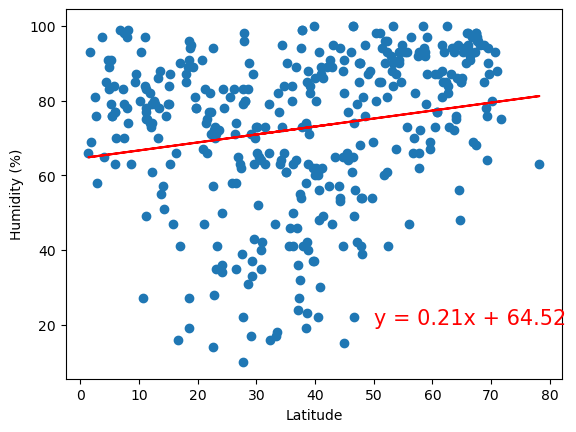

In [165]:
# Northern Hemisphere
# Set the x and y values - for example, latitude vs humidity
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Get the equation of the line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Plot the regression line
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values,"r-")

# Annotate the plot with the equation of the line
plt.annotate(line_eq,(50,20),fontsize=15,color="red")

# Display the r-value
print(f"The r-value is: {r_value**2}")

# Display the plot
plt.show()

The r-value is: 0.01676124535190053


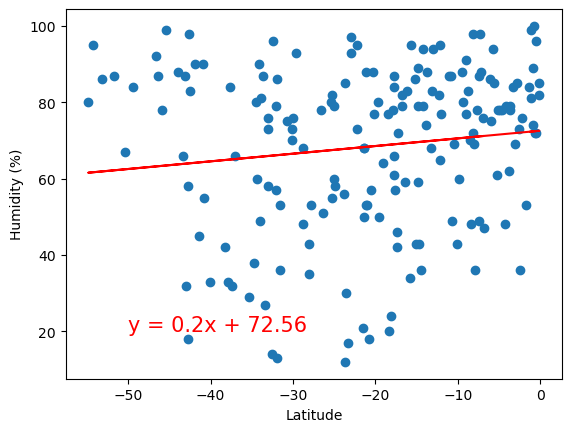

In [175]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Get the equation of the line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Plot the regression line
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values,"r-")

# Annotate the plot with the equation of the line
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# Display the r-value
print(f"The r-value is: {r_value**2}")

# Display the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The r-value is: 0.009705543147090722


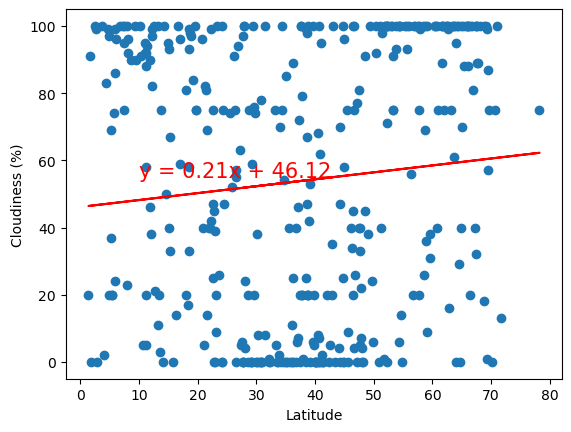

In [174]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Performing linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Getting the equation of the line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Creating a scatter plot of the x and y values
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Plotting the regression line
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values,"r-")

# Annotating the plot with the equation of the line
plt.annotate(line_eq,(10,55),fontsize=15,color="red")

# Displaying the r-value
print(f"The r-value is: {r_value**2}")

# Displaying the plot
plt.show()

The r-value is: 0.00018798839008281765


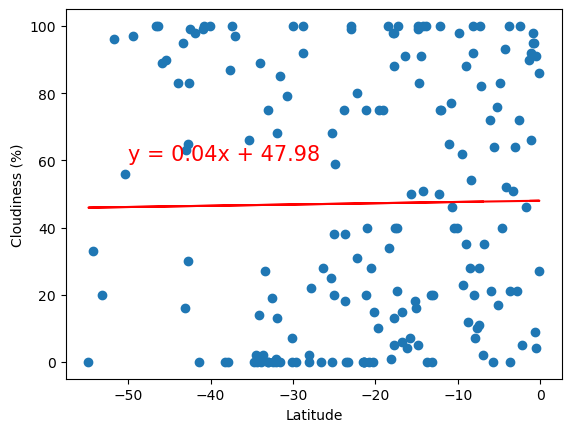

In [173]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Performing linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Getting the equation of the line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Creating a scatter plot of the x and y values
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Plotting the regression line
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values,"r-")

# Annotating the plot with the equation of the line
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")

# Displaying the r-value
print(f"The r-value is: {r_value**2}")

# Displaying the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.01317751540724798


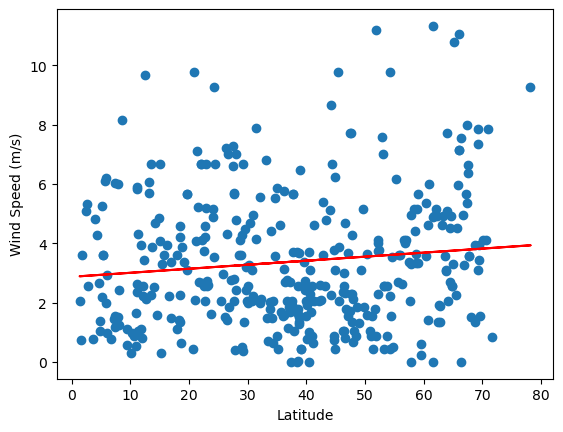

In [172]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Performing linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Getting the equation of the line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Creating a scatter plot of the x and y values
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Plotting the regression line
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values,"r-")

# Annotating the plot with the equation of the line
plt.annotate(line_eq,(5,25),fontsize=15,color="red")

# Displaying the r-value
print(f"The r-value is: {r_value**2}")

# Displaying the plot
plt.show()

The r-value is: 0.08900599785204237


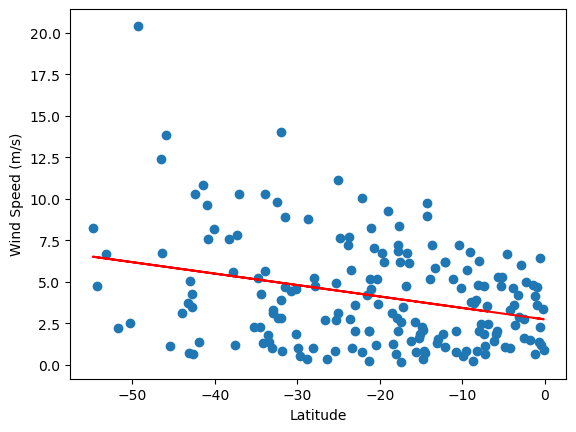

In [171]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Performing linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Getting the equation of the line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Creating a scatter plot of the x and y values
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Plotting the regression line
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values,"r-")

# Annotating the plot with the equation of the line
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")

# Displaying the r-value
print(f"The r-value is: {r_value**2}")

# Displaying the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE